In [2]:
# Imports 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import numpy as np
import re

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Import SK-learn libraries for evaluation.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# NEW
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Pandas display options
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

In [3]:
# Read in data
train_df = pandas.read_csv('./data/train.csv')
print("Shape is:", train_df.shape)
print("Columns are:", train_df.columns)


print("Shape is:", full_test_df.shape)
print("Columns are:", full_test_df.columns)

# Remove ID column
full_test_df = full_test_df.iloc[:, 1:]

# Read in addtl soil type classification
soil_df = pandas.read_csv('./data/soil_classification.csv')

Shape is: (15120, 56)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', '

In [5]:
# Read in addtl soil type classification
soil_df = pandas.read_csv('./data/soil_classification.csv').set_index('Soil_Type')
class1 = pandas.get_dummies(soil_df[['Class 1']], prefix = "Soil")
class2 = pandas.get_dummies(soil_df[['Class 2']], prefix = "Soil")
class3 = pandas.get_dummies(soil_df[['Class 3']], prefix = "Soil")

soil_df2 = pandas.concat([class1.transpose(), class2.transpose(), class3.transpose()], axis = 0)
soil_df2.reset_index(inplace = True)
soil_df2 = soil_df2.rename(columns = {'index':'Soil_Type'})
soil_df3 = soil_df2.groupby('Soil_Type').sum().transpose()

In [18]:
train_df2 = train_df
train_df2['Soil_Type'] = train_df.filter(regex=r'Soil_Type*').idxmax(axis=1)
train_df3 = pandas.merge(train_df2, soil_df3, how = 'left', on = 'Soil_Type' )
train_df3.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   4093       2264     133     23                               175   
1   6791       2763     236     23                               162   
2  12823       2202     321      3                                30   
3  13141       2394     350     12                                42   
4  13992       3432     343      9                               962   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              81                             1360   
1                              68                             1020   
2                               2                             1358   
3                               2                              845   
4                              93                             1423   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            249             222             88   
1            174             253            209   
2            211             236            164   
3            198             220            160   
4            202             227            163   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                 942                 0                 0   
1                                1851                 0                 0   
2                                 743                 0                 0   
3                                1020                 0                 0   
4                                1677                 0                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 1           0           0           1   
1                 1                 0           0           0           0   
2                 0                 1           0           0           0   
3                 0                 1           0           0           0   
4                 1                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           1           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            1            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            0   
1            0            0            0            0

In [25]:
# Try using additional soil vars (as well as all other vars)
train_df = train_df3.drop(columns = 'Soil_Type')
print(train_df[0:10])

      Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   4093       2264     133     23                               175   
1   6791       2763     236     23                               162   
2  12823       2202     321      3                                30   
3  13141       2394     350     12                                42   
4  13992       3432     343      9                               962   
5   7650       3156     110      6                               162   
6    239       2616     359     24                                42   
7   4403       2256     191     25                               150   
8   1105       3112      63     23                               408   
9  11939       2924     272     32                               816   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              81                             1360   
1                              68                             1020 

In [29]:
# Shuffle the available data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_df.shape[0]))
train_df = train_df.iloc[shuffle]

#scale inputs
unscaled_inputs = train_df.drop(columns = ['Id', 'Cover_Type'])
labels = train_df['Cover_Type']
scaler = StandardScaler()
scaler.fit(unscaled_inputs)
scaled_inputs = scaler.transform(unscaled_inputs)

#partition train, dev, test (had to change how we partiton bc the old method didnt work on scaled arrays)
train_data, test_data, train_labels, test_labels = train_test_split(scaled_inputs, labels, test_size=0.2, random_state=1)
train_data, dev_data, train_labels, dev_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print("Available data: ", train_df.shape)
print("Training partition: ", train_data.shape)
print("Dev partition: ", dev_data.shape)
print("Test partition: ", test_data.shape)

# Provide cover type list and labels for output labeling
cover_types = [1,2,3,4,5,6,7]
cover_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

Available data:  (15120, 84)
Training partition:  (9072, 82)
Dev partition:  (3024, 82)
Test partition:  (3024, 82)


3262     4
5023     4
5482     5
2098     6
7760     6
10741    4
8369     3
2000     1
2078     4
10521    2
Name: Cover_Type, dtype: int64

# Decision Tree

Overall F1 score:  0.7528908502210765

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.64
2	Lodgepole Pine  	 0.59
3	Ponderosa Pine  	 0.71
4	Cottonwood/Willow	 0.87
5	Aspen           	 0.85
6	Douglas-fir     	 0.72
7	Krummholz       	 0.89


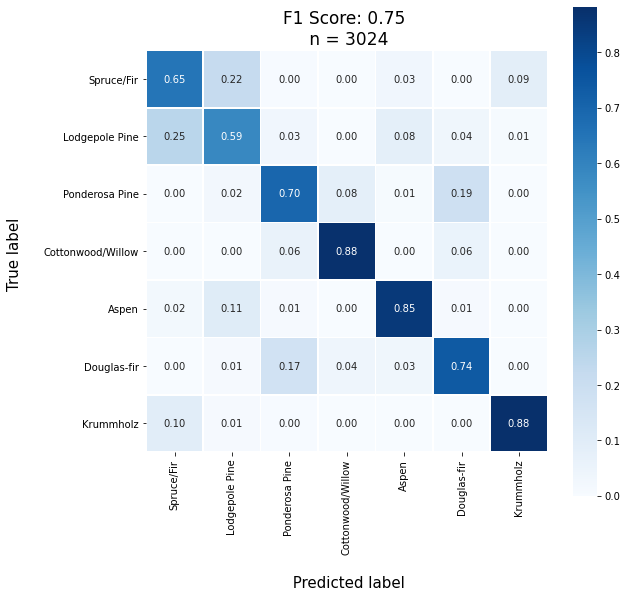

In [31]:
# Basic Decision Tree
tree_clf1 = DecisionTreeClassifier(random_state=0).fit(train_data, train_labels)
tree_pred1 = tree_clf1.predict(dev_data)


overall_f1_score = metrics.f1_score(dev_labels, tree_pred1, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, tree_pred1, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')
    
#conf_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix(dev_labels, tree_pred1), display_labels = cover_labels)
#conf_matrix.plot(xticks_rotation='vertical')
#plt.show()

cm = metrics.confusion_matrix(dev_labels, tree_pred1)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = cover_labels, yticklabels = cover_labels, )
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(overall_f1_score, tree_pred1.size)
plt.title(all_sample_title, size = 17);

In [58]:
pred_series =  pandas.Series(tree_pred1, index = dev_labels.index, name = "Predicted_Type")
output_df = dev_data.join(dev_labels).join(pred_series)
output_df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
5631        3314     354     12                                60   
9750        3216      72      9                               120   
5591        2280      59     25                                60   
7181        2820     326     19                               371   
6206        2476      85      3                                 0   
3647        2110      60      9                                 0   
745         2764      76      7                               323   
12877       2284     352     19                               190   
10607       3277      91     18                                 0   
12234       2098       8     28                               108   
9715        3250     279     17                               153   
3414        2310     286     28                               391   
9530        3260     290      6                               108   
4522        2771     315     18                               108   
8597        3323     222      7                               150   
2990        2300      16     27                               277   
4454        2109     117     20                                 0   
14987       2486     142     23                                60   
4442        2243     111     23                               170   
7369        3401      58     12                               256   
7783        2772      10     10                               339   
11486       2714     150     14                                85   
2072        2803      58      4                               228   
7024        3220     101     16                               283   
436         2676       9     14                                30   
12931       2252     112     26                                67   
12312       2841     307     21                                 0   
1           2590      56      2                               212   
13165       2418      74     14                                 0   
5109        2397      65     12                                95   
4716        2303     124     10                                 0   
5542        2272     328     19                                30   
13492       3029     263     13                               108   
11046       2500       0      4                                30   
3484        2250      72     17                                 0   
3401        2780     105     21                               108   
5408        2250     328     27                                95   
3608        2295      95     21                               537   
7188        2577      89     25                                95   
6696        2884     322     16                                67   
1632        2731      67     31                                30   
2266        2078     311     33                                95   
12208       2062     141     20                                30   
2245        2771     327     21                                95   
904         3037     346     13                               418   
2014        2151     177     23                               295   
14729       3371     127      9                               750   
2428        1946     319     17                                 0   
2518        2006      23     14                                95   
10591       2978     157     27                               240   
4994        2233      22     28                                95   
10489       3507       1     12                               488   
6791        2784     232     23                               192   
1473        3237     152     14                               541   
8303        2831     107     33                               190   
8072        2885     139     10                               330   
401         2861     107      8                                30   
1262 

In [61]:
mismatch_df = output_df[output_df.Cover_Type != output_df.Predicted_Type]
mismatch_df

In [8]:
print("Initial depth:", tree_clf1.get_depth())
print("Max features:", tree_clf1.max_features_)
print("Initial num leaves:", tree_clf1.get_n_leaves())
tree_clf1.get_params()

Initial depth: 31
Max features: 54
Initial num leaves: 1425


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [8]:
## Use GridSearch to optimize hyperparameters

#set values of hyperparameters
params = {'max_depth': [18, 19, 20, 21],
         'max_leaf_nodes': [810, 815, 820, 825, 830, 835, 840],
         'max_features': [52, 53, 54],
         'min_impurity_decrease':[0.0, 0.000001, 0.00001, 0.0001, 0.001] }

#initiate gridsearch and fit model
clf = GridSearchCV(tree_clf1, params, cv=None, scoring='accuracy')
clf.fit(train_data, train_labels)

#show results of gridsearch
#print("The best value of max_depth is", clf.best_params_["max_depth"])
#print("The best value of max_features is", clf.best_params_["max_features"])
#print("The best value of max_leaf_nodes is", clf.best_params_["max_leaf_nodes"])

pandas.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]].sort_values("mean_test_score", ascending = False)[1:10]

KeyboardInterrupt: 

In [32]:
# Tuned Decision Tree
tree_clf2 = DecisionTreeClassifier(random_state=0, 
                                   max_depth = clf.best_params_["max_depth"], 
                                   max_features = clf.best_params_["max_features"], 
                                   max_leaf_nodes = clf.best_params_["max_leaf_nodes"],
                                   min_impurity_decrease = clf.best_params_["min_impurity_decrease"]
                                  ).fit(train_data, train_labels)
tree_pred2 = tree_clf2.predict(dev_data)


overall_f1_score = metrics.f1_score(dev_labels, tree_pred2, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, tree_pred2, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

AttributeError: 'VotingClassifier' object has no attribute 'best_params_'

# Random Forest

Overall F1 score:  0.8349871422389902

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.77
2	Lodgepole Pine  	 0.72
3	Ponderosa Pine  	 0.78
4	Cottonwood/Willow	 0.93
5	Aspen           	 0.91
6	Douglas-fir     	 0.79
7	Krummholz       	 0.94


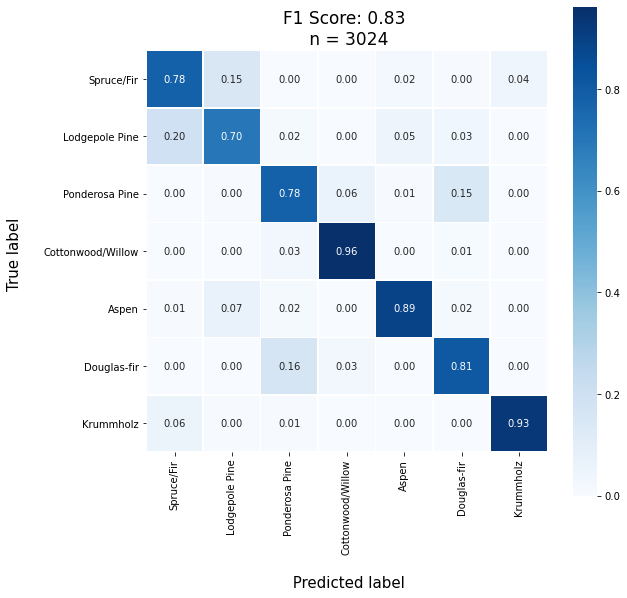

In [33]:
# Random forest
clf_rf = RandomForestClassifier(random_state = 0, n_estimators = 100)  
clf_rf.fit(train_data, train_labels.values.flatten())
  
rf_pred1 = clf_rf.predict(dev_data)

overall_f1_score = metrics.f1_score(dev_labels, rf_pred1, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, rf_pred1, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')
    
cm = metrics.confusion_matrix(dev_labels, rf_pred1)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = cover_labels, yticklabels = cover_labels, )
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(overall_f1_score, rf_pred1.size)
plt.title(all_sample_title, size = 17);

In [12]:
# Try using optimal hyperparameters from decision tree exploration
clf_rf2 = RandomForestClassifier(random_state = 0,
                                n_estimators = 100,
                                #max_depth = clf.best_params_["max_depth"], 
                                #max_features = clf.best_params_["max_features"], 
                                #max_leaf_nodes = clf.best_params_["max_leaf_nodes"],
                                #min_impurity_decrease = clf.best_params_["min_impurity_decrease"]
                                  )  
clf_rf2.fit(train_data, train_labels.values.flatten())
  
rf_pred2 = clf_rf2.predict(dev_data)

overall_f1_score = metrics.f1_score(dev_labels, rf_pred2, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, rf_pred2, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

Overall F1 score:  0.8381070461193986

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.75
2	Lodgepole Pine  	 0.71
3	Ponderosa Pine  	 0.81
4	Cottonwood/Willow	 0.94
5	Aspen           	 0.91
6	Douglas-fir     	 0.83
7	Krummholz       	 0.94


In [13]:
# Use gridsearch to optimize hyperparameters specific to random forest classifier

#set values of hyperparameters
params = {'n_estimators': [175, 200, 225],
         'bootstrap': [True, False],
         'warm_start': [True, False],
         'max_samples': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}

#initiate gridsearch and fit model
clf = GridSearchCV(clf_rf, params, cv=None, scoring='accuracy')
clf.fit(train_data, train_labels.values.flatten())

pandas.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]].sort_values("mean_test_score", ascending = False)[1:10]

params  \
72   {'bootstrap': False, 'max_samples': 0.95, 'n_estimators': 175, 'warm_start': True}   
60   {'bootstrap': False, 'max_samples': 0.85, 'n_estimators': 175, 'warm_start': True}   
61  {'bootstrap': False, 'max_samples': 0.85, 'n_estimators': 175, 'warm_start': False}   
54    {'bootstrap': False, 'max_samples': 0.8, 'n_estimators': 175, 'warm_start': True}   
43   {'bootstrap': False, 'max_samples': 0.7, 'n_estimators': 175, 'warm_start': False}   
66    {'bootstrap': False, 'max_samples': 0.9, 'n_estimators': 175, 'warm_start': True}   
67   {'bootstrap': False, 'max_samples': 0.9, 'n_estimators': 175, 'warm_start': False}   
55   {'bootstrap': False, 'max_samples': 0.8, 'n_estimators': 175, 'warm_start': False}   
73  {'bootstrap': False, 'max_samples': 0.95, 'n_estimators': 175, 'warm_start': False}   
49  {'bootstrap': False, 'max_samples': 0.75, 'n_estimators': 175, 'warm_start': False}   
48   {'bootstrap': False, 'max_samples': 0.75, 'n_estimators': 175, 'warm_start': True}   
78      {'bootstrap': False, 'max_samples': 1, 'n_estimators': 175, 'warm_start': True}   
79     {'bootstrap': False, 'max_samples': 1, 'n_estimators': 175, 'warm_start': False}   
58    {'bootstrap': False, 'max_samples': 0.8, 'n_estimators': 225, 'warm_start': True}   

    mean_test_score  
72         0.846783  
60         0.846783  
61         0.846783  
54         0.846783  
43         0.846783  
66         0.846783  
67         0.846783  
55         0.846783  
73         0.846783  
49         0.846783  
48         0.846783  
78         0.846783  
79         0.846783  
58         0.846673

In [10]:
# With optimal hyperparameters from random forest
#{'max_depth': 20, 'max_features': 55, 'max_leaf_nodes': 830, 'min_impurity_decrease': 0.0001}	
clf_rf3 = RandomForestClassifier(random_state = 0,
                                 #max_depth = 20, 
                                 #max_features = 55, 
                                 #max_leaf_nodes = 830,
                                 #min_impurity_decrease = 0.0001,
                                 n_estimators = 175,
                                 bootstrap = False,
                                 max_samples = 0.95,
                                 warm_start = True
                                 )  
clf_rf3.fit(train_data, train_labels.values.flatten())
  
rf_pred3 = clf_rf3.predict(dev_data)

overall_f1_score = metrics.f1_score(dev_labels, rf_pred3, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, rf_pred3, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

Overall F1 score:  0.8575290837149688

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.78
2	Lodgepole Pine  	 0.74
3	Ponderosa Pine  	 0.82
4	Cottonwood/Willow	 0.95
5	Aspen           	 0.93
6	Douglas-fir     	 0.84
7	Krummholz       	 0.95


# ExtraTrees

In [11]:
clf_et = ExtraTreesClassifier(n_estimators=200, random_state=0)
clf_et.fit(train_data, train_labels.values.flatten())

pred = clf_et.predict(dev_data)

overall_f1_score = metrics.f1_score(dev_labels, pred, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

Overall F1 score:  0.8527740911158099

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.78
2	Lodgepole Pine  	 0.73
3	Ponderosa Pine  	 0.81
4	Cottonwood/Willow	 0.94
5	Aspen           	 0.91
6	Douglas-fir     	 0.84
7	Krummholz       	 0.95


# Ensemble

In [ ]:
estimators = [
     ('rf', RandomForestClassifier(random_state=0, n_estimators=175)),
     ('et', ExtraTreesClassifier(random_state=0, n_estimators=200))
]

In [12]:
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)

clf.fit(train_data, train_labels.values.flatten())

pred = clf.predict(dev_data)

overall_f1_score = metrics.f1_score(dev_labels, pred, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

Overall F1 score:  0.8599339680611142

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.78
2	Lodgepole Pine  	 0.75
3	Ponderosa Pine  	 0.83
4	Cottonwood/Willow	 0.95
5	Aspen           	 0.92
6	Douglas-fir     	 0.84
7	Krummholz       	 0.95


In [15]:
clf = VotingClassifier(
    estimators=estimators, 
    voting = 'hard'
)

clf.fit(train_data, train_labels.values.flatten())

pred = clf.predict(dev_data)

overall_f1_score = metrics.f1_score(dev_labels, pred, average='weighted')
class_f1_scores =  metrics.f1_score(dev_labels, pred, average=None)

print("Overall F1 score: ", overall_f1_score)
print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

Overall F1 score:  0.8455168556733512

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.77
2	Lodgepole Pine  	 0.71
3	Ponderosa Pine  	 0.82
4	Cottonwood/Willow	 0.94
5	Aspen           	 0.91
6	Douglas-fir     	 0.82
7	Krummholz       	 0.95


# PCA

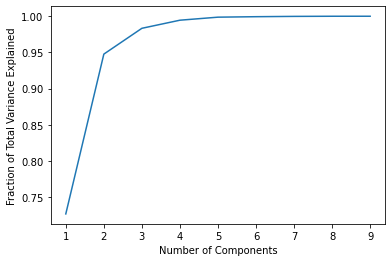

In [27]:
def run_pca(n_components):
    
    pca_model = PCA(n_components, random_state = 0)
    pca_model.fit(train_data)
    X_pca = pca_model.transform(train_data)
    var_explain_array.append(sum(pca_model.explained_variance_ratio_))

n_components_array = np.arange(1, 10, 1)
var_explain_array = []
for k in n_components_array:
    run_pca(k)
    
plt.plot(n_components_array, var_explain_array)
plt.xlabel("Number of Components")
plt.ylabel("Fraction of Total Variance Explained")
plt.show()  

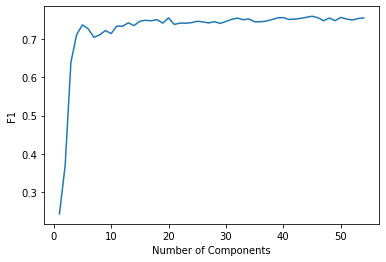

Max F1 score: 0.7596777849000416 with n = 45


In [42]:
# Decision Tree w/ PCA input
def test_pca(k): 
    pca_model = PCA(n_components = k, random_state = 0)
    pca_model.fit(train_data)
    Xtrain_pca = pca_model.transform(train_data)
    Xdev_pca = pca_model.transform(dev_data)

    tree_clf4 = DecisionTreeClassifier(random_state=0).fit(Xtrain_pca, train_labels)
    tree_pred4 = tree_clf4.predict(Xdev_pca)


    overall_f1_score = metrics.f1_score(dev_labels, tree_pred4, average='weighted')
    f1_array.append(overall_f1_score)

    
n_components_array = np.arange(1, 55, 1)
f1_array = []
for k in n_components_array:
    test_pca(k)
    
plt.plot(n_components_array, f1_array)
plt.xlabel("Number of Components")
plt.ylabel("F1")
plt.show()

# Find max value
print("Max F1 score:", max(f1_array), "with n =", n_components_array[np.argmax(f1_array)])

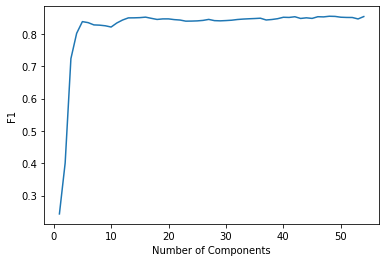

Max F1 score: 0.8543703759333366 with n = 48


In [43]:
# Random Forest w/ PCA input
def test_pca(k): 
    pca_model = PCA(n_components = k, random_state = 0)
    pca_model.fit(train_data)
    Xtrain_pca = pca_model.transform(train_data)
    Xdev_pca = pca_model.transform(dev_data)

    clf_rf4 = RandomForestClassifier(random_state = 0,
                                 n_estimators = 175,
                                 bootstrap = False,
                                 max_samples = 0.95,
                                 warm_start = True
                                 )  
    clf_rf4.fit(Xtrain_pca, train_labels.values.flatten())
  
    rf_pred4 = clf_rf4.predict(Xdev_pca)

    overall_f1_score = metrics.f1_score(dev_labels, rf_pred4, average='weighted')
    f1_array.append(overall_f1_score)

n_components_array = np.arange(1, 55, 1)
f1_array = []
for k in n_components_array:
    test_pca(k)
    
plt.plot(n_components_array, f1_array)
plt.xlabel("Number of Components")
plt.ylabel("F1")
plt.show()

# Find max value
print("Max F1 score:", max(f1_array), "with n =", n_components_array[np.argmax(f1_array)])

# Test Data

In [22]:
# Try running on the full Kaggle test data
rf_pred3 = clf_rf3.predict(full_test_df)

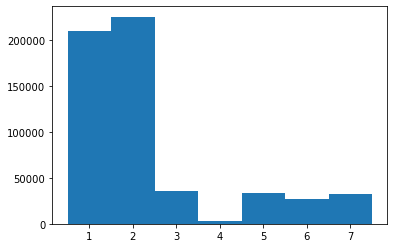

In [23]:
plt.hist(rf_pred3, align = 'left', bins = [1, 2, 3, 4, 5, 6, 7, 8]) 
plt.show()